In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
housing = pd.read_csv('data/housing_w_demo_features.csv', index_col=0)
housing = housing.drop_duplicates()
housing.shape

(2529, 94)

In [3]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(0) 
housing['MasVnrType'] = housing['MasVnrType'].fillna('None') 
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0) 
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
housing['GarageFinish'] = housing['GarageFinish'].fillna('None')
housing['GarageType'] = housing['GarageType'].fillna('None')
housing['GarageQual'] = housing['GarageQual'].fillna('None')
housing['GarageCond'] = housing['GarageCond'].fillna('None')
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('None')
housing['BsmtCond'] = housing['BsmtCond'].fillna('None')
housing['BsmtQual'] = housing['BsmtQual'].fillna('None')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('None')
housing['TotalBath'] = housing['FullBath'] + (housing['HalfBath']*.5)
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('Unf')
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0) 
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('None')
housing['MSSubClass'] = housing['MSSubClass'].astype(str)

housing = housing.drop(labels= ['PoolQC', 'MiscFeature', 'Alley', 'Fence','BsmtHalfBath', 'YrSold', 'MoSold',
                                'FullBath','HalfBath', 'Condition2', 'BsmtFinSF2','Electrical', 'Utilities',
                                'RoofStyle', 'RoofMatl','MasVnrArea', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
                               'BsmtFinType2',  'Heating', 'GarageYrBlt', 'SaleCondition',
                               'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                               'total', 'white', 'asian', 'black','native_am', 'nhopi', 'other',
                                'bi_racial', 'ScreenPorch', 'ExterCond', 'KitchenAbvGr',
                               '1stFlrSF', '2ndFlrSF', 'GarageCond', 'GarageQual', 'PoolArea',
                               'Street','PavedDrive','FireplaceQu', 'TotRmsAbvGrd','BsmtFullBath',
                               'BsmtHalfBath', 'MiscVal', 'CentralAir', 'Functional', 'HouseStyle',
                               'MasVnrType', 'Exterior1st', 'Exterior2nd', 'Foundation','TotalBath',
                               'hispanic', 'median_hh_income', 'BsmtFinType1',
                                'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF','OverallCond',
                               'LowQualFinSF','GarageType', 'GarageCars','GarageFinish',
                               'ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual'], axis=1)




In [6]:
solo_cups = housing.loc[housing['is_collegetown'] == 1]
y1 = solo_cups['SalePrice']
solo_cups = solo_cups.drop(labels = ['SalePrice', 'PID'], axis =1)
old_people = housing.loc[housing['is_collegetown'] == 0]
y2 = old_people['SalePrice']
old_people = old_people.drop(labels = ['SalePrice', 'PID'], axis =1)

In [7]:
X1 = pd.get_dummies(solo_cups, drop_first=True, dummy_na=True)
X2 = pd.get_dummies(old_people, drop_first=True, dummy_na=True)



In [8]:
from sklearn.model_selection import train_test_split

#solo cups
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
#old people
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

### Solo Cups Space

In [19]:
lasso.set_params(alpha=10, normalize=True)
lasso.fit(X1_train, y1_train)
print('The intercept is %.4f' %(lasso.intercept_))
lassoCoef = pd.Series(lasso.coef_, index=X1_train.columns)
print('The slopes are \n%s' %(lassoCoef))
lasso.score(X1_train, y1_train)

The intercept is -1318597.6506
The slopes are 
GrLivArea            54.459881
LotFrontage          -8.370429
LotArea               0.634203
OverallQual       12702.636290
YearBuilt           344.419722
                      ...     
SaleType_ConLw     8784.246821
SaleType_New      77056.824839
SaleType_Oth      10259.741708
SaleType_WD        9234.665951
SaleType_nan          0.000000
Length: 79, dtype: float64


0.8598634716678909

In [12]:
coefs = []
intercepts = []
R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize = True)  
    lasso.fit(X1_train, y1_train)
    intercepts.append(lasso.intercept_)
    coefs.append(lasso.coef_)
    R2.append(lasso.score(X1_train, y1_train))  

/home/jack/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100755367951.6844, tolerance: 157493028.24564973
  positive)


Text(0.5, 1.0, 'Change of Lasso Slopes Varying Alpha')

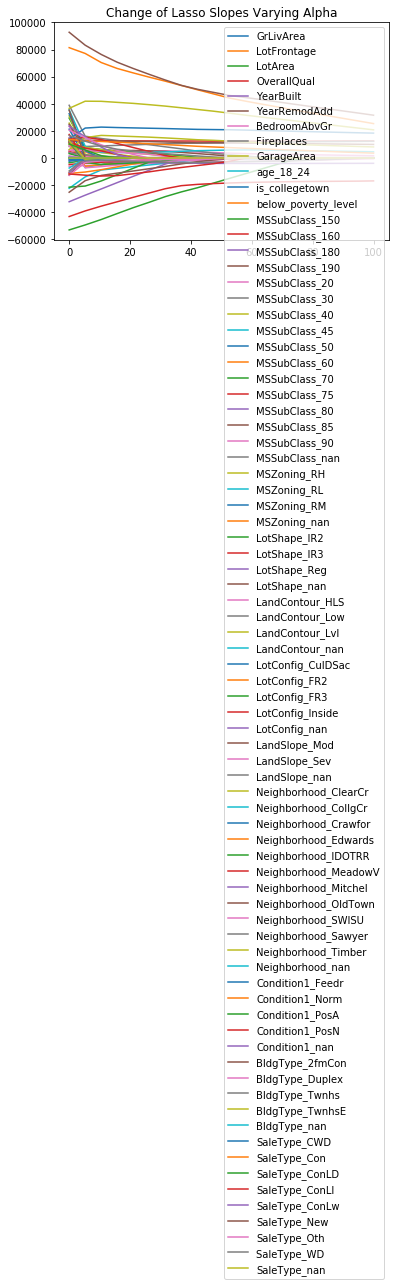

In [14]:
coefs = pd.DataFrame(np.array(coefs), columns=X1.columns)

for name in coefs.columns:
    plt.plot(alphaRange, coefs[name], label=name)
plt.legend(loc=1)    
plt.title('Change of Lasso Slopes Varying Alpha')

In [15]:
coefs

,GrLivArea,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BedroomAbvGr,Fireplaces,GarageArea,age_18_24,...,BldgType_nan,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan
0,57.905562,-34.657207,0.621104,12372.445620,398.905430,308.252136,-6090.540766,8572.351681,21.635015,-22316.698699,...,0.0,575.63073,81366.097530,10374.547926,-11745.509802,23665.093662,92720.077634,20618.266727,16651.206915,0.0
1,55.968229,-15.303613,0.630723,12661.925875,347.064748,309.367707,-5461.957026,8555.926306,22.400525,-13867.155574,...,0.0,-0.00000,77093.243369,5909.944963,-12609.129096,15652.538444,83176.178142,14925.744696,12434.722376,0.0
2,54.301723,-7.799057,0.634599,12698.411921,343.693544,314.109360,-5093.971234,8939.702564,22.713146,-8778.683028,...,0.0,-0.00000,70409.037724,1791.383150,-13226.882521,8074.454743,76362.409847,9753.566256,8890.041283,0.0
3,52.850274,-3.581201,0.645415,12680.844678,334.374665,316.505569,-4691.303161,9345.068755,22.421945,-7540.414054,...,0.0,-0.00000,66026.422636,0.000000,-12923.504646,2422.810652,70634.328714,5692.473552,6505.929174,0.0
4,51.464808,-0.033032,0.657284,12664.066896,324.157618,318.395152,-4328.918912,9739.281014,22.137307,-6303.819152,...,0.0,-0.00000,62752.155610,0.000000,-11576.137588,0.000000,66005.811923,2681.540242,5171.666859,0.0
5,50.087222,-0.000000,0.674341,12633.565507,316.121139,320.134558,-3992.202240,10124.928977,21.991022,-5108.155565,...,0.0,-0.00000,59625.272427,0.000000,-10135.882146,0.000000,61681.644032,0.000000,4091.353028,0.0
6,48.801218,-0.000000,0.691701,12587.875336,309.673638,321.569707,-3669.885803,10506.623704,21.887375,-3860.789067,...,0.0,-0.00000,56663.447525,-0.000000,-8430.245449,0.000000,57521.927233,0.000000,3258.899903,0.0
7,47.753363,-0.000000,0.706513,12555.737860,310.455079,323.397640,-3371.148224,10807.772127,21.863126,-2561.451674,...,0.0,-0.00000,53496.720616,-0.000000,-6951.842417,-0.000000,53586.874539,0.000000,2461.598035,0.0
8,46.774601,-0.000000,0.714678,12555.822541,307.559528,325.518587,-3099.785106,11052.282461,21.942337,-1238.827187,...,0.0,-0.00000,50362.799722,-0.000000,-5530.936038,-0.000000,50715.171316,0.000000,1582.350087,0.0
9,45.855466,-0.000000,0.724507,12480.639713,306.585715,326.079223,-2891.541917,11270.520544,22.030860,-27.587080,...,0.0,-0.00000,47309.424258,-0.000000,-4162.362950,-0.000000,48432.738168,0.000000,756.937283,0.0


In [16]:
from sklearn.model_selection import cross_val_score

print(np.sqrt(-1* cross_val_score(lasso, X1_train, y1_train, cv=5, scoring='neg_mean_squared_error', n_jobs =-1)))


[34421.28055543 24394.08305533 18802.25784178 26675.47573894
 22890.68081613]
